In [30]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import joypy
from matplotlib.ticker import MaxNLocator, ScalarFormatter, FixedFormatter, FixedLocator

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [31]:
# code for the font from https://github.com/scentellegher/code_snippets/blob/d6e3a65b0c4e715d982466f77d94c4f8b0827b38/matplotlib_font/Matplotlib_custom_font.ipynb

from matplotlib import font_manager

font_dirs = ['font/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Barlow'

In [32]:
# import data

df = pd.read_csv('./data/county_data.csv',  dtype = {'fips' : 'str', 'rucc_grouped' : 'str', 'RUCC_2013' : 'str'})

In [33]:
rep = df[['proximity_rep_coloc', 'proximity_rep_sci', 'proximity_rep_res']]
dem = df[['proximity_dem_coloc', 'proximity_dem_sci', 'proximity_dem_res']]

rep = rep.rename(columns={'proximity_rep_coloc' : 'Offline', 'proximity_rep_sci' : 'Online', 'proximity_rep_res' : 'Residential'})
dem = dem.rename(columns={'proximity_dem_coloc' : 'Offline', 'proximity_dem_sci' : 'Online', 'proximity_dem_res' : 'Residential'})

rep = pd.melt(rep, value_vars=['Offline', 'Online', 'Residential'], 
               var_name='exposure', value_name='rep')
dem = pd.melt(dem, value_vars=['Offline', 'Online', 'Residential'], 
               var_name='exposure_2', value_name='dem')

In [34]:
df_plot = pd.concat([rep, dem], axis=1)

In [35]:
df_plot

,exposure,rep,exposure_2,dem
0,Offline,0.6446,Offline,0.3214
1,Offline,0.6968,Offline,0.2482
2,Offline,0.5111,Offline,0.4705
3,Offline,0.6853,Offline,0.2808
4,Offline,0.7901,Offline,0.1683
...,...,...,...,...
9289,Residential,0.6446,Residential,0.2823
9290,Residential,0.3659,Residential,0.4822
9291,Residential,0.7428,Residential,0.1429
9292,Residential,0.8038,Residential,0.1240


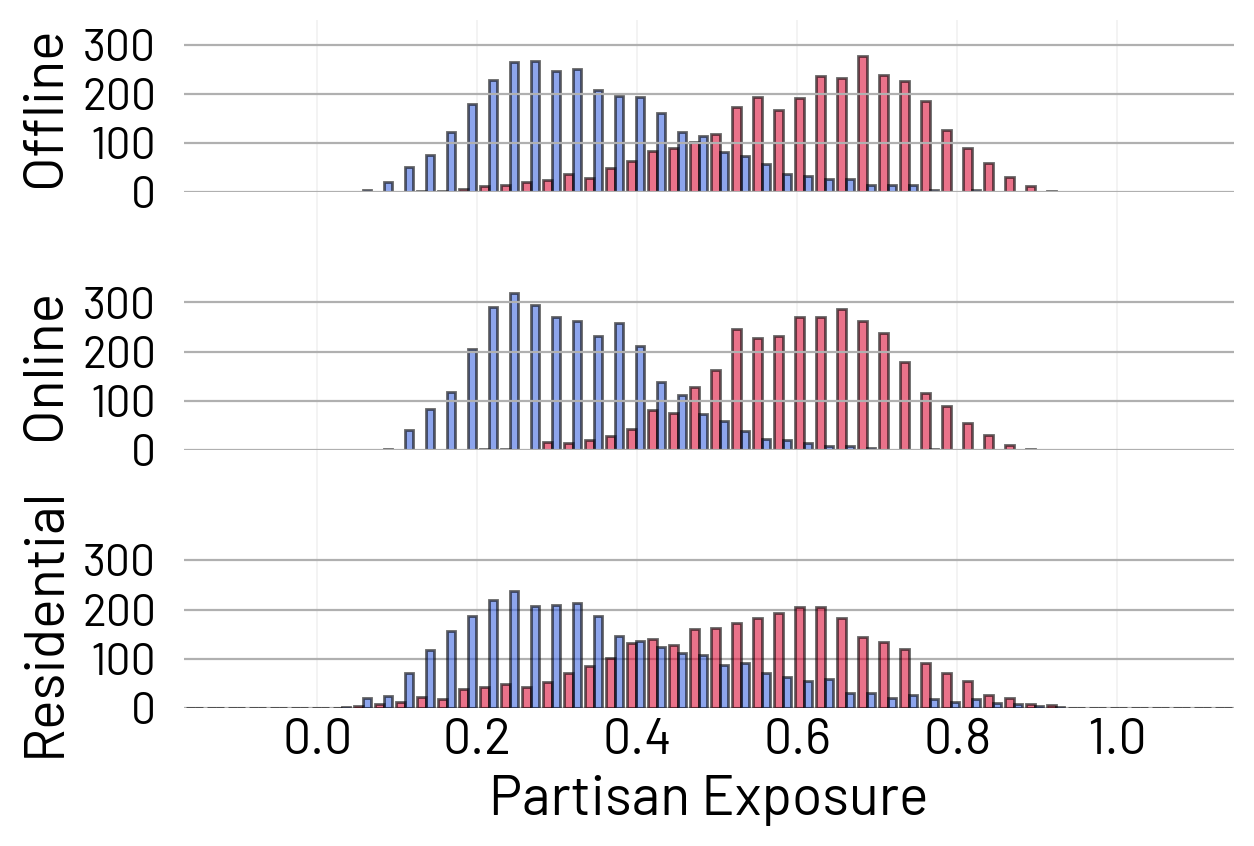

In [36]:
fig, axes = joypy.joyplot(df_plot, by='exposure', color=['crimson', 'royalblue'],alpha=0.6, figsize=(6, 4), linewidth=1 ,legend=False, hist=True, bins=50, overlap=-0.5, grid=True, ylim=[0,350])

plt.xticks(fontsize=18)


for ax in axes[:-1]:
    ax.set_ylabel(ax.get_yticklabels()[0].get_text(), fontsize=20)
    ax.yaxis.set_major_locator(MaxNLocator(4))
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.tick_params(axis='y', which='major', labelsize=16)

fig.subplots_adjust(left=0.1)

plt.xlabel('Partisan Exposure', size=20)

plt.grid(linewidth=0.1)



## METRO

In [37]:
df_metro = df[df['rucc_grouped'] == '1']
rep = df_metro[['proximity_rep_coloc', 'proximity_rep_sci', 'proximity_rep_res']]
dem = df_metro[['proximity_dem_coloc', 'proximity_dem_sci', 'proximity_dem_res']]

rep = rep.rename(columns={'proximity_rep_coloc' : 'Offline', 'proximity_rep_sci' : 'Online', 'proximity_rep_res' : 'Residential'})
dem = dem.rename(columns={'proximity_dem_coloc' : 'Offline', 'proximity_dem_sci' : 'Online', 'proximity_dem_res' : 'Residential'})

rep = pd.melt(rep, value_vars=['Offline', 'Online', 'Residential'], 
               var_name='exposure', value_name='rep')
dem = pd.melt(dem, value_vars=['Offline', 'Online', 'Residential'], 
               var_name='exposure_2', value_name='dem')

df_plot = pd.concat([rep, dem], axis=1)

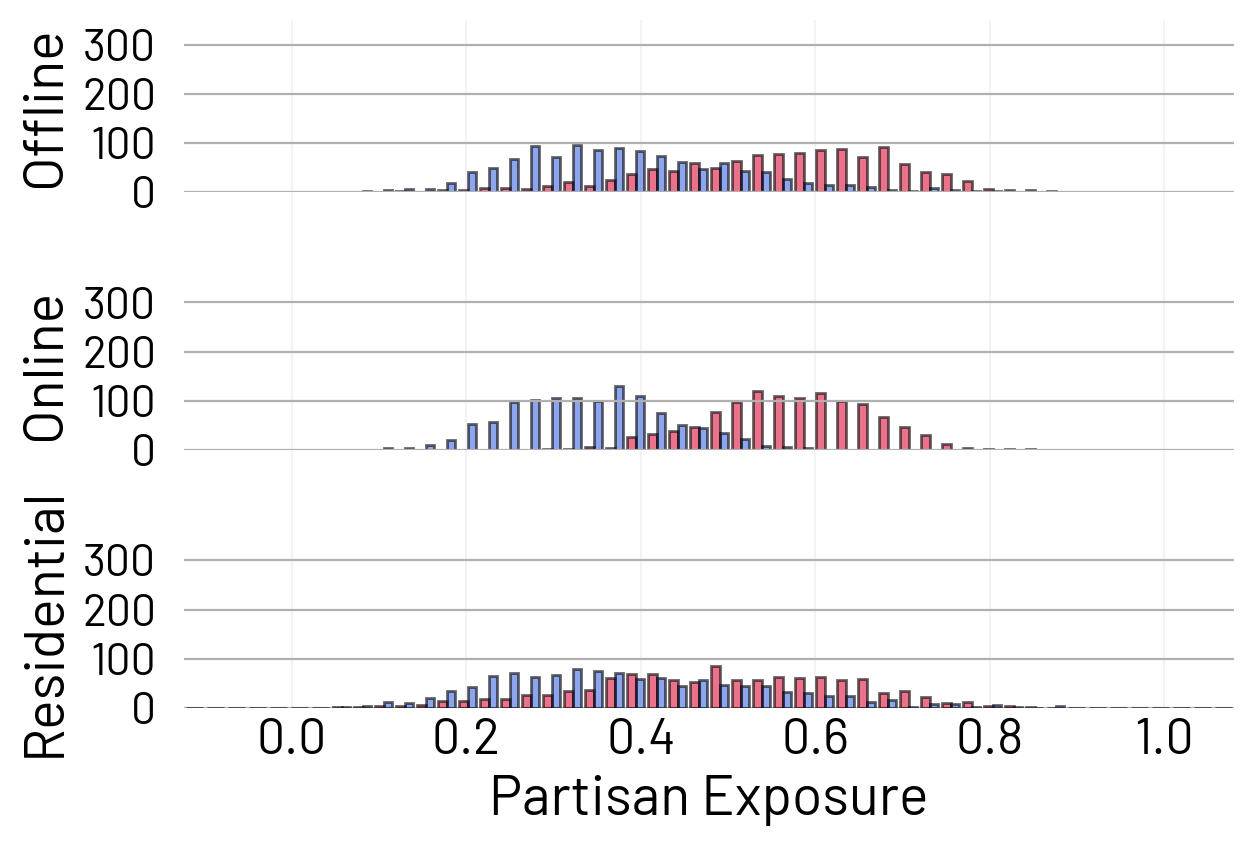

In [38]:
fig, axes = joypy.joyplot(df_plot, by='exposure', color=['crimson', 'royalblue'],alpha=0.6, figsize=(6, 4), linewidth=1 ,legend=False, hist=True, bins=50, overlap=-0.5, grid=True, ylim=[0,350])

plt.xticks(fontsize=18)

for ax in axes[:-1]:
    ax.set_ylabel(ax.get_yticklabels()[0].get_text(), fontsize=20)
    ax.yaxis.set_major_locator(MaxNLocator(4))
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.tick_params(axis='y', which='major', labelsize=16)

fig.subplots_adjust(left=0.1)

plt.xlabel('Partisan Exposure', size=20)

plt.grid(linewidth=0.1)

### NON-METRO

In [39]:
df_nonmetro = df[(df['rucc_grouped'] == '2') | (df['rucc_grouped'] == '3') | (df['rucc_grouped'] == '4')]
rep = df_nonmetro[['proximity_rep_coloc', 'proximity_rep_sci', 'proximity_rep_res']]
dem = df_nonmetro[['proximity_dem_coloc', 'proximity_dem_sci', 'proximity_dem_res']]

rep = rep.rename(columns={'proximity_rep_coloc' : 'Offline', 'proximity_rep_sci' : 'Online', 'proximity_rep_res' : 'Residential'})
dem = dem.rename(columns={'proximity_dem_coloc' : 'Offline', 'proximity_dem_sci' : 'Online', 'proximity_dem_res' : 'Residential'})

rep = pd.melt(rep, value_vars=['Offline', 'Online', 'Residential'], 
               var_name='exposure', value_name='rep')
dem = pd.melt(dem, value_vars=['Offline', 'Online', 'Residential'], 
               var_name='exposure_2', value_name='dem')

df_plot = pd.concat([rep, dem], axis=1)

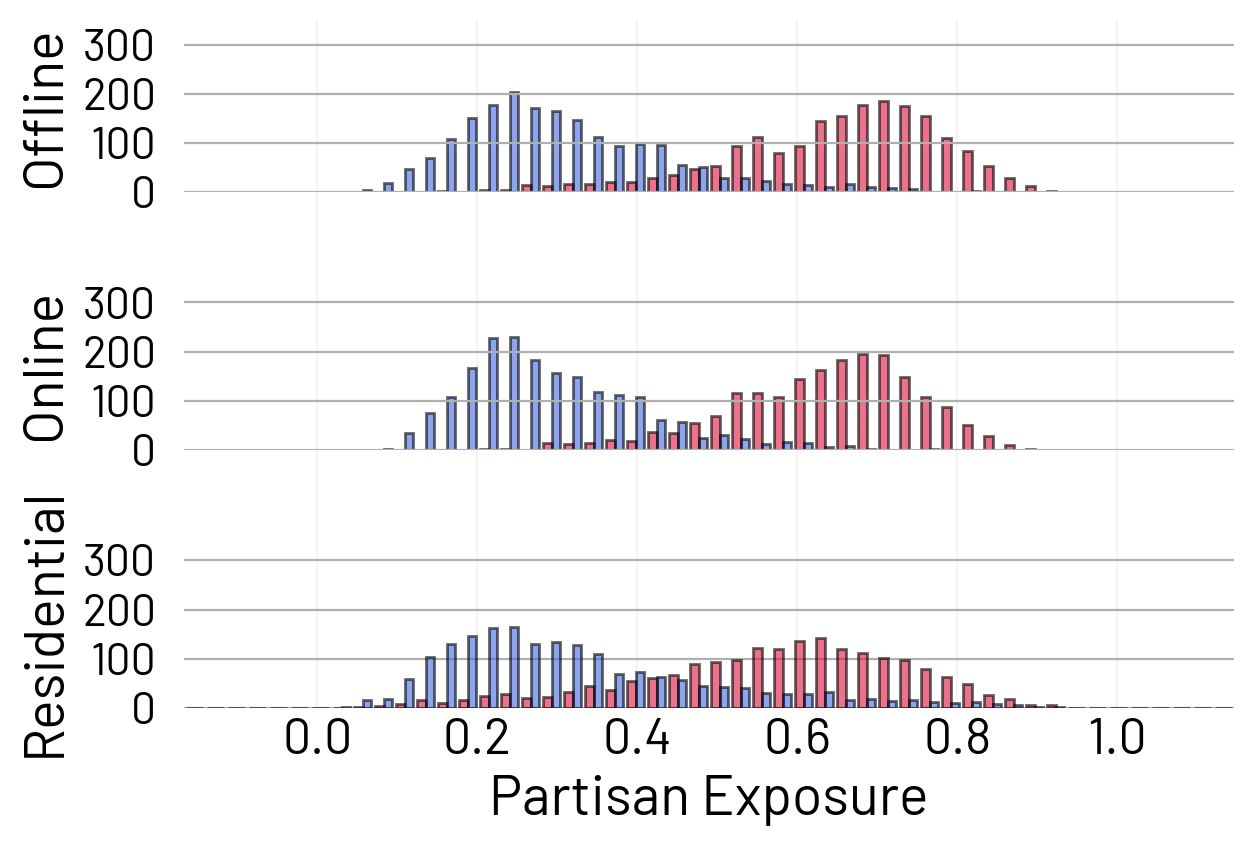

In [40]:
fig, axes = joypy.joyplot(df_plot, by='exposure', color=['crimson', 'royalblue'],alpha=0.6, figsize=(6, 4), linewidth=1 ,legend=False, hist=True, bins=50, overlap=-0.5, grid=True, ylim=[0,350])

plt.xticks(fontsize=18)


for ax in axes[:-1]:
    ax.set_ylabel(ax.get_yticklabels()[0].get_text(), fontsize=20)
    ax.yaxis.set_major_locator(MaxNLocator(4))
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.tick_params(axis='y', which='major', labelsize=16)

fig.subplots_adjust(left=0.1)

plt.xlabel('Partisan Exposure', size=20)

plt.grid(linewidth=0.1)

## DIFFERENCES BETWEEN DIMENSIONS

In [41]:
from scipy import stats

#DEM
t_statistic, p_value = stats.ttest_ind(df['proximity_dem_coloc'], df['proximity_dem_sci'])
t_statistic_formatted = f"{t_statistic:.2e}"
p_value_formatted = f"{p_value:.2e}"
print("t-statistic:", t_statistic, "---- p-value:", p_value)
t_statistic, p_value = stats.ttest_ind(df['proximity_dem_coloc'], df['proximity_dem_res'])
t_statistic_formatted = f"{t_statistic:.2e}"
p_value_formatted = f"{p_value:.2e}"
print("t-statistic:", t_statistic, "---- p-value:", p_value)
t_statistic, p_value = stats.ttest_ind(df['proximity_dem_sci'], df['proximity_dem_res'])
t_statistic_formatted = f"{t_statistic:.2e}"
p_value_formatted = f"{p_value:.2e}"
print("t-statistic:", t_statistic, "---- p-value:", p_value)


print('---------------------------------------------------------------------')

#REP
t_statistic, p_value = stats.ttest_ind(df['proximity_rep_coloc'], df['proximity_rep_sci'])
t_statistic_formatted = f"{t_statistic:.2e}"
p_value_formatted = f"{p_value:.2e}"
print("t-statistic:", t_statistic, "---- p-value:", p_value)
t_statistic, p_value = stats.ttest_ind(df['proximity_rep_coloc'], df['proximity_rep_res'])
t_statistic_formatted = f"{t_statistic:.2e}"
p_value_formatted = f"{p_value:.2e}"
print("t-statistic:", t_statistic, "---- p-value:", p_value)
t_statistic, p_value = stats.ttest_ind(df['proximity_rep_sci'], df['proximity_rep_res'])
t_statistic_formatted = f"{t_statistic:.2e}"
p_value_formatted = f"{p_value:.2e}"
print("t-statistic:", t_statistic, "---- p-value:", p_value)


t-statistic: 7.950411318811172 ---- p-value: 2.192877730519889e-15
t-statistic: -3.9680045819971608 ---- p-value: 7.329558714285493e-05
t-statistic: -11.123802604139538 ---- p-value: 1.7857191808205667e-28
---------------------------------------------------------------------
t-statistic: 1.930886447819387 ---- p-value: 0.05354267921442313
t-statistic: 20.30787012190426 ---- p-value: 8.107326674077216e-89
t-statistic: 20.221585840397417 ---- p-value: 4.195297503520575e-88


## DIFFERENCES BETWEEN DIMENSIONS - METRO AREAS

In [42]:
rep_metro = df[df['rucc_grouped'] == '1'][['proximity_rep_coloc', 'proximity_rep_sci', 'proximity_rep_res']]
dem_metro = df[df['rucc_grouped'] == '1'][['proximity_dem_coloc', 'proximity_dem_sci', 'proximity_dem_res']]

print('t-test Metro Areas')
#DEM
t_statistic, p_value = stats.ttest_ind(dem_metro['proximity_dem_coloc'], dem_metro['proximity_dem_sci'])
print("t-statistic:", t_statistic, "---- p-value:", p_value)
t_statistic, p_value = stats.ttest_ind(dem_metro['proximity_dem_coloc'], dem_metro['proximity_dem_res'])
print("t-statistic:", t_statistic, "---- p-value:", p_value)
t_statistic, p_value = stats.ttest_ind(dem_metro['proximity_dem_sci'], dem_metro['proximity_dem_res'])
print("t-statistic:", t_statistic, "---- p-value:", p_value)


print('---------------------------------------------------------------------')

#REP
t_statistic, p_value = stats.ttest_ind(rep_metro['proximity_rep_coloc'], rep_metro['proximity_rep_sci'])
print("t-statistic:", t_statistic, "---- p-value:", p_value)
t_statistic, p_value = stats.ttest_ind(rep_metro['proximity_rep_coloc'], rep_metro['proximity_rep_res'])
print("t-statistic:", t_statistic, "---- p-value:", p_value)
t_statistic, p_value = stats.ttest_ind(rep_metro['proximity_rep_sci'], rep_metro['proximity_rep_res'])
print("t-statistic:", t_statistic, "---- p-value:", p_value)


t-test Metro Areas
t-statistic: 9.382183593613325 ---- p-value: 1.491563475247724e-20
t-statistic: -0.9907060504877778 ---- p-value: 0.3219328958498633
t-statistic: -9.383034086070797 ---- p-value: 1.480015588965872e-20
---------------------------------------------------------------------
t-statistic: -2.2052083669753935 ---- p-value: 0.027537665053355267
t-statistic: 12.871974841816334 ---- p-value: 1.1424088538049653e-36
t-statistic: 16.692986200924356 ---- p-value: 3.7459289298024905e-59


## DIFFERENCES BETWEEN DIMENSIONS - NON-METRO AREAS

In [43]:
rep_nonmetro = df[(df['rucc_grouped'] == '2') | (df['rucc_grouped'] == '3') | (df['rucc_grouped'] == '4')][['proximity_rep_coloc', 'proximity_rep_sci', 'proximity_rep_res']]
dem_nonmetro = df[(df['rucc_grouped'] == '2') | (df['rucc_grouped'] == '3') | (df['rucc_grouped'] == '4')][['proximity_dem_coloc', 'proximity_dem_sci', 'proximity_dem_res']]

print('t-test Non-Metro Areas')
#DEM
t_statistic, p_value = stats.ttest_ind(dem_nonmetro['proximity_dem_coloc'], dem_nonmetro['proximity_dem_sci'])
print("t-statistic:", t_statistic, "---- p-value:", p_value)
t_statistic, p_value = stats.ttest_ind(dem_nonmetro['proximity_dem_coloc'], dem_nonmetro['proximity_dem_res'])
print("t-statistic:", t_statistic, "---- p-value:", p_value)
t_statistic, p_value = stats.ttest_ind(dem_nonmetro['proximity_dem_sci'], dem_nonmetro['proximity_dem_res'])
print("t-statistic:", t_statistic, "---- p-value:", p_value)


print('---------------------------------------------------------------------')

#REP
t_statistic, p_value = stats.ttest_ind(rep_nonmetro['proximity_rep_coloc'], rep_nonmetro['proximity_rep_sci'])
print("t-statistic:", t_statistic, "---- p-value:", p_value)
t_statistic, p_value = stats.ttest_ind(rep_nonmetro['proximity_rep_coloc'], rep_nonmetro['proximity_rep_res'])
print("t-statistic:", t_statistic, "---- p-value:", p_value)
t_statistic, p_value = stats.ttest_ind(rep_nonmetro['proximity_rep_sci'], rep_nonmetro['proximity_rep_res'])
print("t-statistic:", t_statistic, "---- p-value:", p_value)


t-test Non-Metro Areas
t-statistic: 3.4376443019968383 ---- p-value: 0.0005929666261017737
t-statistic: -4.286923694814163 ---- p-value: 1.855648413216398e-05
t-statistic: -7.35127745731677 ---- p-value: 2.381639224712368e-13
---------------------------------------------------------------------
t-statistic: 4.010776163030398 ---- p-value: 6.165837180679652e-05
t-statistic: 16.69465306730462 ---- p-value: 1.7592470686653017e-60
t-statistic: 13.961794572716455 ---- p-value: 2.9174002346983874e-43


## DIFFERENCES BETWEEN METRO AND NON-METRO - DEMOCRATIC

In [44]:
t_statistic, p_value = stats.ttest_ind(dem_metro['proximity_dem_coloc'], dem_nonmetro['proximity_dem_coloc'], equal_var=False)
print("t-statistic:", t_statistic, "---- p-value:", p_value)
t_statistic, p_value = stats.ttest_ind(dem_metro['proximity_dem_sci'], dem_nonmetro['proximity_dem_sci'], equal_var=False)
print("t-statistic:", t_statistic, "---- p-value:", p_value)
t_statistic, p_value = stats.ttest_ind(dem_metro['proximity_dem_res'], dem_nonmetro['proximity_dem_res'], equal_var=False)
print("t-statistic:", t_statistic, "---- p-value:", p_value)

t-statistic: 15.924955895136462 ---- p-value: 2.0586412241126523e-54
t-statistic: 12.46951926383596 ---- p-value: 8.808431028402394e-35
t-statistic: 10.202011847140417 ---- p-value: 5.3395561737426385e-24


## DIFFERENCES BETWEEN METRO AND NON-METRO - REPUBLICANS

In [45]:
t_statistic, p_value = stats.ttest_ind(rep_metro['proximity_rep_coloc'], rep_nonmetro['proximity_rep_coloc'], equal_var=False)
print("t-statistic:", t_statistic, "---- p-value:", p_value)
t_statistic, p_value = stats.ttest_ind(rep_metro['proximity_rep_sci'], rep_nonmetro['proximity_rep_sci'], equal_var=False)
print("t-statistic:", t_statistic, "---- p-value:", p_value)
t_statistic, p_value = stats.ttest_ind(rep_metro['proximity_rep_res'], rep_nonmetro['proximity_rep_res'], equal_var=False)
print("t-statistic:", t_statistic, "---- p-value:", p_value)

t-statistic: -17.71593714529172 ---- p-value: 3.9148329849785237e-66
t-statistic: -16.072103010912837 ---- p-value: 9.758103795232264e-56
t-statistic: -14.063484017040338 ---- p-value: 2.2587920957504476e-43


## OFFLINE vs COMMUTING

In [46]:
rep_comm = df[['proximity_rep_coloc', 'proximity_rep_comm']]
dem_comm = df[['proximity_dem_coloc', 'proximity_dem_comm']]

rep_comm = rep_comm.rename(columns={'proximity_rep_coloc' : 'Offline', 'proximity_rep_comm' : 'Commuting'})
dem_comm = dem_comm.rename(columns={'proximity_dem_coloc' : 'Offline', 'proximity_dem_comm' : 'Commuting'})

rep_comm = pd.melt(rep_comm, value_vars=['Offline', 'Commuting'], 
               var_name='exposure', value_name='rep')
dem_comm = pd.melt(dem_comm, value_vars=['Offline', 'Commuting'], 
               var_name='exposure_2', value_name='dem')

In [47]:
df_plot_comm = pd.concat([rep_comm, dem_comm], axis=1)

In [48]:
df_plot_comm

,exposure,rep,exposure_2,dem
0,Offline,0.6446,Offline,0.3214
1,Offline,0.6968,Offline,0.2482
2,Offline,0.5111,Offline,0.4705
3,Offline,0.6853,Offline,0.2808
4,Offline,0.7901,Offline,0.1683
...,...,...,...,...
6191,Commuting,0.7120,Commuting,0.2287
6192,Commuting,0.3434,Commuting,0.5974
6193,Commuting,0.7662,Commuting,0.1673
6194,Commuting,0.7787,Commuting,0.1677


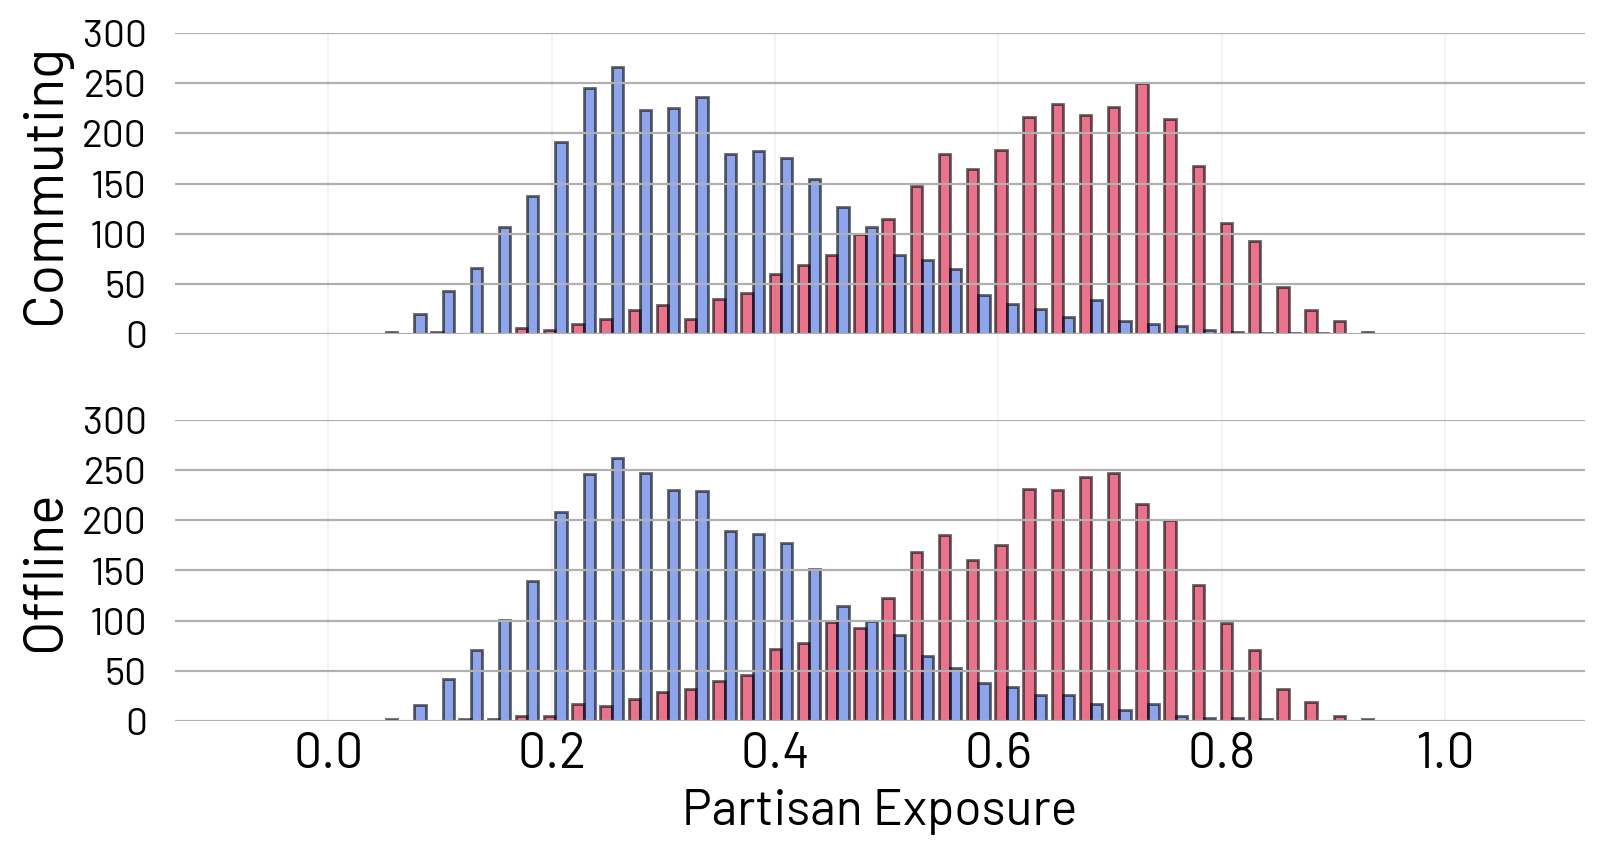

In [49]:
fig, axes = joypy.joyplot(df_plot_comm, by='exposure', color=['crimson', 'royalblue'],alpha=0.6, figsize=(8, 4), linewidth=1 ,legend=False, hist=True, bins=50, overlap=-0.5, grid=True, ylim=[0,300])
plt.xticks(fontsize=18)

for ax in axes[:-1]:
    ax.set_ylabel(ax.get_yticklabels()[0].get_text(), fontsize=20)
    ax.yaxis.set_major_locator(MaxNLocator(6))
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.tick_params(axis='y', which='major', labelsize=14)

fig.subplots_adjust(left=0.1)


plt.xlabel('Partisan Exposure', size=18)

plt.grid(linewidth=0.1)

In [50]:
t_statistic, p_value = stats.ttest_ind(df['proximity_rep_coloc'], df['proximity_rep_comm'])
print("t-statistic:", t_statistic, "---- p-value:", p_value)
t_statistic, p_value = stats.ttest_ind(df['proximity_dem_coloc'], df['proximity_dem_comm'])
print("t-statistic:", t_statistic, "---- p-value:", p_value)

t-statistic: nan ---- p-value: nan
t-statistic: nan ---- p-value: nan
